In [10]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import pyarrow as pa
import dask
import fsspec
from datetime import datetime, timedelta
from pyarrow.parquet import ParquetFile

import dask.dataframe as dd
import spark as spark
from dask.distributed import Client
import os
import xarray as xr
import glob

import spark
#plot
import data
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import hvplot.xarray

%matplotlib inline
from kerchunk.hdf import SingleHdf5ToZarr
from kerchunk.combine import MultiZarrToZarr


In [3]:
dir_files = [os.path.join("short_range_18files\input", files) for files in os.listdir("short_range_18files\input")]
#dir_files = [os.path.join("short_range_2files\input", files) for files in os.listdir("short_range_2files\input")]
print(dir_files)

['short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f001.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f002.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f003.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f004.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f005.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f006.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f007.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f008.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channel_rt.f009.conus.nc', 'short_range_18files\\input\\nwm.20220911_short_range_nwm.t00z.short_range.channe

In [63]:
# Create list for
individual_files = []
# Loop through each file in the list
for i in dir_files:

    # Load a single dataset
    timestep_ds = xr.open_dataset(i)

    # Add the dataset to the list
    individual_files.append(timestep_ds)

# Combine individual datasets into a single xarray along the 'time' dimension
ds = xr.concat(individual_files, dim='time')
df = ds.to_dataframe()
df = df.streamflow
#sf_df = df.loc[slice(None), slice(None), int('101'):int('101')] # For one feature_id
#sf_df = df.loc[slice(None), slice(None), int('101'):int('1000')] # For multiple feature_id
#sf_df = df.loc[slice(None), slice(None), int('101'):int('2000')] # For multiple feature_id length:1512

#sf_df

In [64]:
df = pd.Series.to_frame(df)

df.to_parquet("data/test_feature_id.gzip"
             , engine="fastparquet" #"pyarrow", "auto"
             , compression="gzip" # "snappy"
            )


In [65]:
ParquetFile("data/test_feature_id.gzip").metadata #  num_columns: 3

  created_by: fastparquet-python version 0.8.3 (build 0)
  num_columns: 4
  num_rows: 49981284
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 1591

In [69]:
data = dd.read_parquet(
    "data/test_feature_id.gzip"
    , storage_options={"anon": True}
    )
data
#%time data.loc[slice(None), int('101')]

#result = data.shape[0].compute()
result = data.compute()
%time result
result1=result
%time result1


CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns


streamflow
time                reference_time feature_id            
2022-09-11 01:00:00 2022-09-11     101               0.18
                                   179               0.01
                                   181               0.01
                                   183               0.01
                                   185               0.01
...                                                   ...
2022-09-11 18:00:00 2022-09-11     1180001800        0.00
                                   1180001801        0.00
                                   1180001802        0.00
                                   1180001803        0.00
                                   1180001804        0.00

[49981284 rows x 1 columns]

CPU times: total: 78.1 ms
Wall time: 71.1 ms
CPU times: total: 62.5 ms
Wall time: 67 ms
CPU times: total: 31.2 ms
Wall time: 25 ms
CPU times: total: 31.2 ms
Wall time: 36 ms


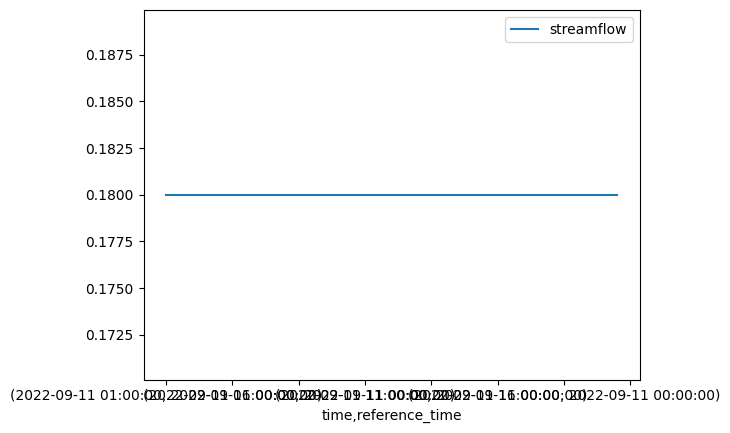

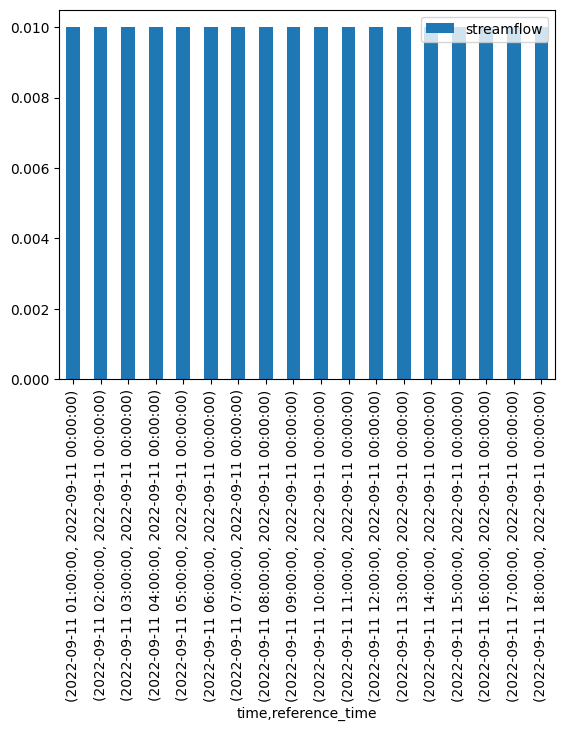

In [70]:
#result.index.names
# Plots the feature_id = 101
#%time result = result.loc[slice(None),slice(None), 101]
%time result = result.loc[slice(None),slice(None), 101]
%time result1 = result1.loc[slice(None),slice(None), 179]

#result
%time result.plot(kind="line", label="feature_id=101")
%time result1.plot(kind="bar", label="feature_id=987")
plt.legend()
plt.show()